In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import vice
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
from python_packages.plotting import plot_cdf
import random
import seaborn as sns
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z

In [3]:
# load in models from files

inside_out = vice.output("VICE/migration/outputs/diffusion/insideout")
late_burst = vice.output("VICE/migration/outputs/diffusion/lateburst")
outer_burst = vice.output("VICE/migration/outputs/diffusion/outerburst")
late_burst_small = vice.output("VICE/migration/outputs/diffusion/lateburst_0_5")
late_burst_big = vice.output("VICE/migration/outputs/diffusion/lateburst_2_5")

for model_ in [inside_out, outer_burst, late_burst_small, late_burst_big]:
    model_.stars["abs_z"] = calculate_z(model_)
    model_.stars["R_origin"] = zone_to_R(np.array(model_.stars["zone_origin"]))
    model_.stars["R_final"] = zone_to_R(np.array(model_.stars["zone_final"]))

In [4]:
max_zone = 155
stars = sample_stars(inside_out.stars.filter("zone_origin", "<", max_zone), num=10_000)

(-1.2, 1.0756104182719726)

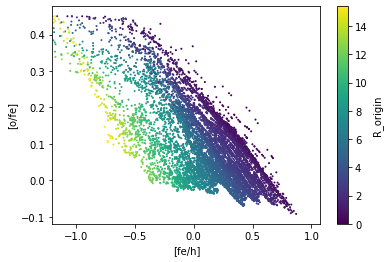

In [5]:
show_stars(stars, "[fe/h]", "[o/fe]", c="R_origin")
plt.xlim(-1.2)

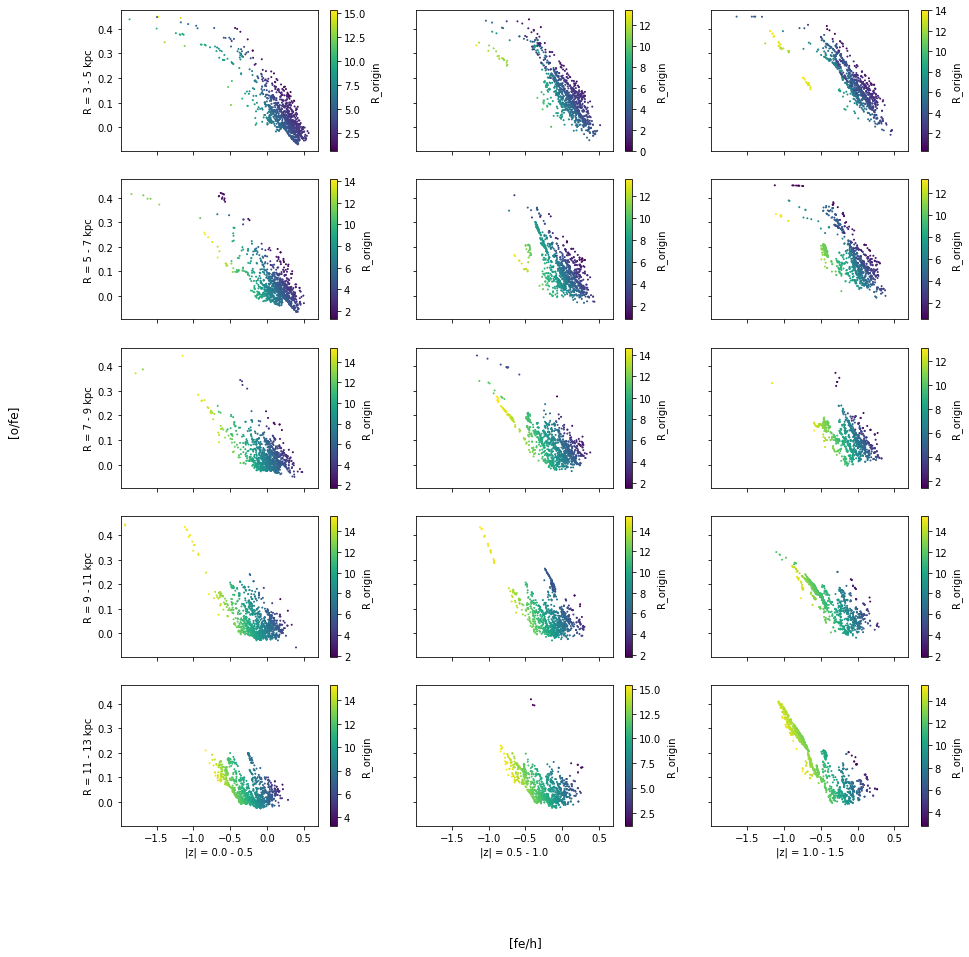

In [6]:
show_at_R_z(inside_out.stars, "[fe/h]", "[o/fe]", c="R_origin")

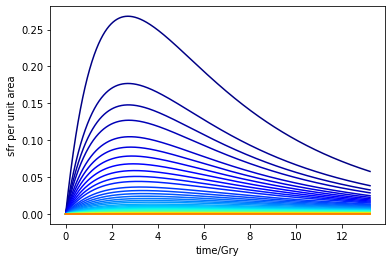

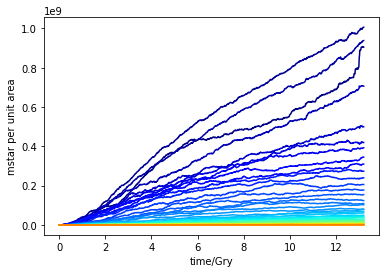

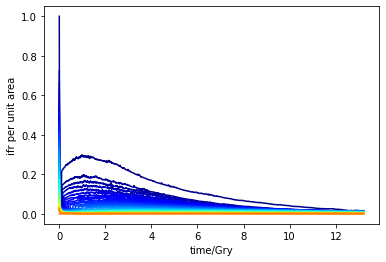

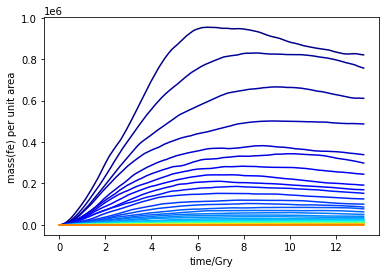

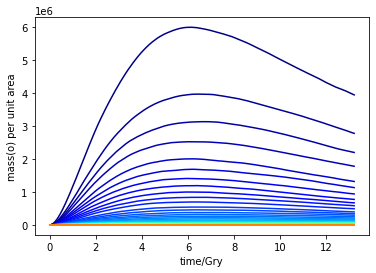

In [62]:
cmap = plt.get_cmap('jet')

N=50
for var in ["sfr", "mstar", "ifr", "mass(fe)", "mass(o)"]:
    for zone in np.round(np.linspace(1, 155, N)):
        R = zone_to_R(zone)
        x = inside_out.zones["zone%i" % zone].history["time"]
        y = np.array(inside_out.zones["zone%i" % zone].history[var])/R # formally 2 pi R dr
        plt.plot(x, y, color=cmap(zone/200), label="R_gal = %2.1f" % R)

        plt.xlabel("time/Gry")
        plt.ylabel(var + " per unit area")
        #plt.legend()
    plt.show()
    

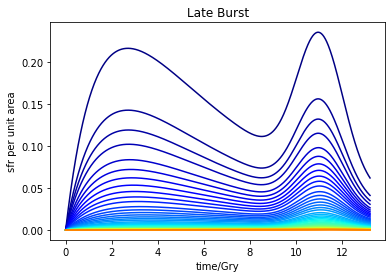

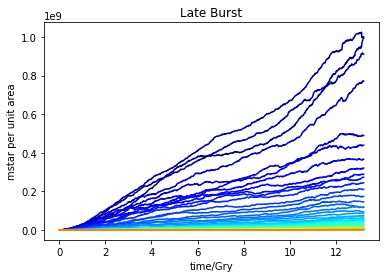

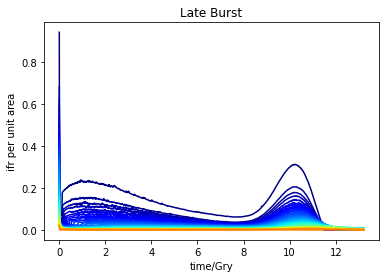

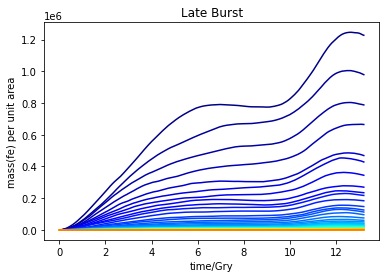

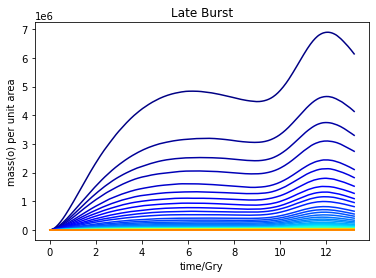

In [13]:
cmap = plt.get_cmap('jet')

N=50
for var in ["sfr", "mstar", "ifr", "mass(fe)", "mass(o)"]:
    for zone in np.round(np.linspace(1, 155, N)):
        R = zone_to_R(zone)
        x = inside_out.zones["zone%i" % zone].history["time"]
        y = np.array(late_burst_big.zones["zone%i" % zone].history[var])/R
        plt.plot(x, y, color=cmap(zone/200), label="R_gal = %2.1f" % R)

        plt.xlabel("time/Gry")
        plt.ylabel(var + " per unit area")
        #plt.legend()
        plt.title("Late Burst")
    plt.show()

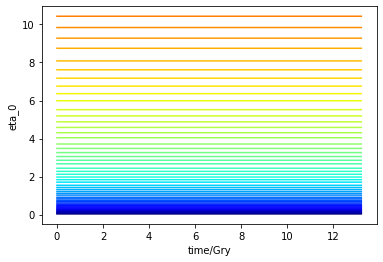

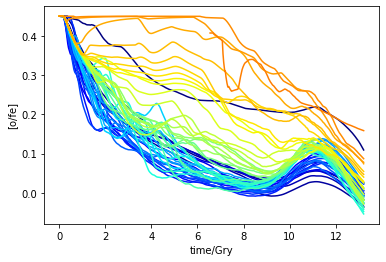

In [14]:
cmap = plt.get_cmap('jet')

N=50
for var in ["eta_0", "[o/fe]"]:
    for zone in np.round(np.linspace(0, 155, N)):
        x = inside_out.zones["zone%i" % zone].history["time"]
        y = late_burst_big.zones["zone%i" % zone].history[var]
        plt.plot(x, y, color=cmap(zone/200), label="R_gal = %2.1f" % zone_to_R(zone))

        plt.xlabel("time/Gry")
        plt.ylabel(var)
        #plt.legend()
    plt.show()

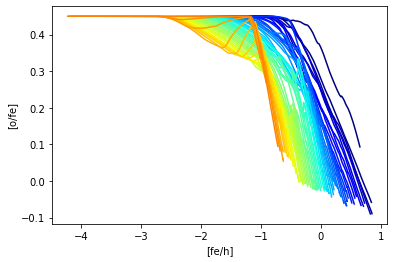

In [16]:
cmap = plt.get_cmap('jet')

N=50
for zone in np.round(np.linspace(0, 154, N)):
    x = inside_out.zones["zone%i" % zone].history["[fe/h]"]
    y = inside_out.zones["zone%i" % zone].history["[o/fe]"]
    plt.plot(x, y, color=cmap(zone/200), label="R_gal = %2.1f" % zone_to_R(zone))

    plt.xlabel("[fe/h]")
    plt.ylabel("[o/fe]")
    #plt.legend()

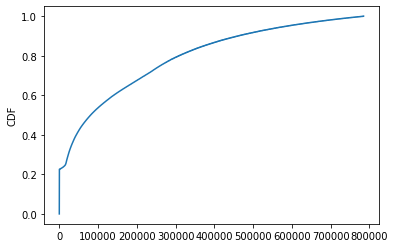

In [10]:
plot_cdf(inside_out.stars["mass"])

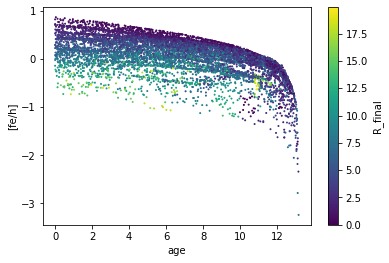

In [19]:
show_stars(stars, x="age", y="[fe/h]", c="R_final")

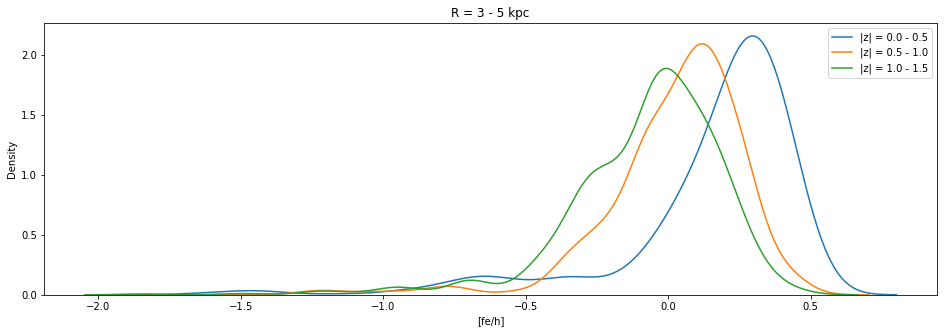

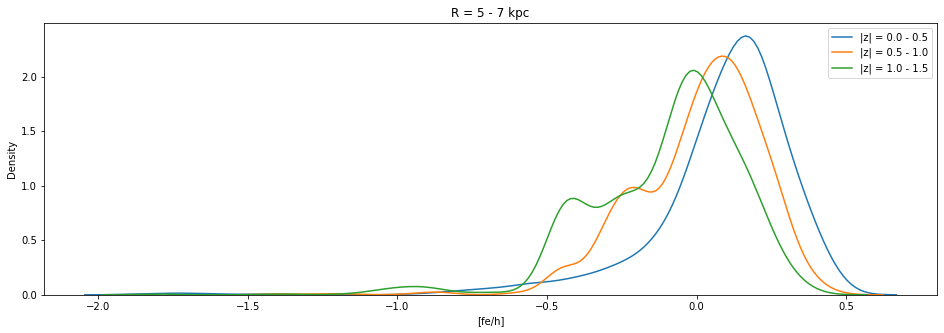

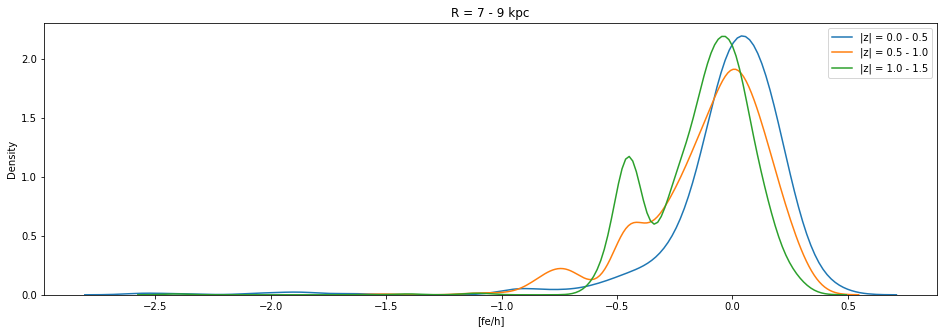

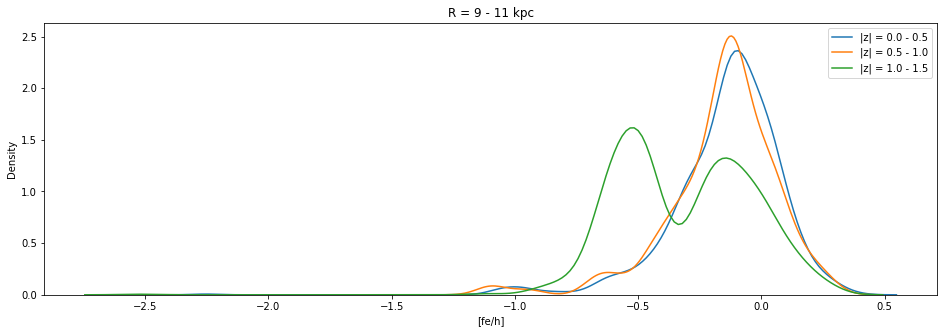

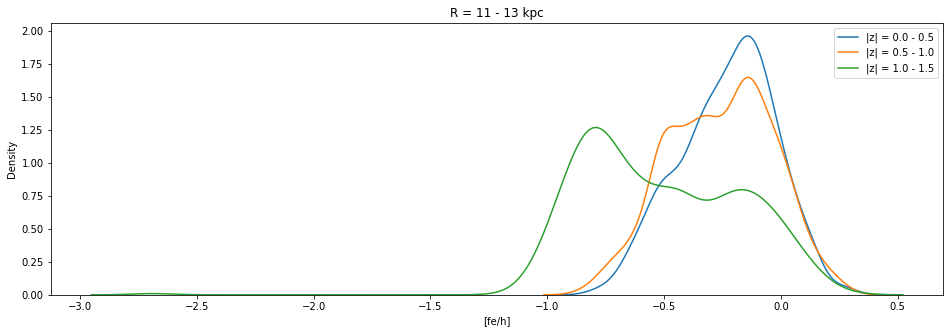

In [12]:
for R_min, R_max in [(3,5), (5,7), (7,9), (9,11), (11,13)]:
    plt.figure(figsize=(16,5))
    
    for i in range(3):
        z_min, z_max = [(0, 0.5), (0.5, 1), (1, 1.5)][i]
        filtered = sample_stars(filter_stars(inside_out.stars, R_min, R_max, z_min, z_max), num=1000)
        show_stars(filtered, "[fe/h]", label="|z| = %1.1f - %1.1f" % (z_min, z_max), kde=True)
    plt.title("R = %i - %i kpc" %(R_min, R_max))
    plt.legend()

    plt.show()

AttributeError: 'Line2D' object has no property 'vmin'

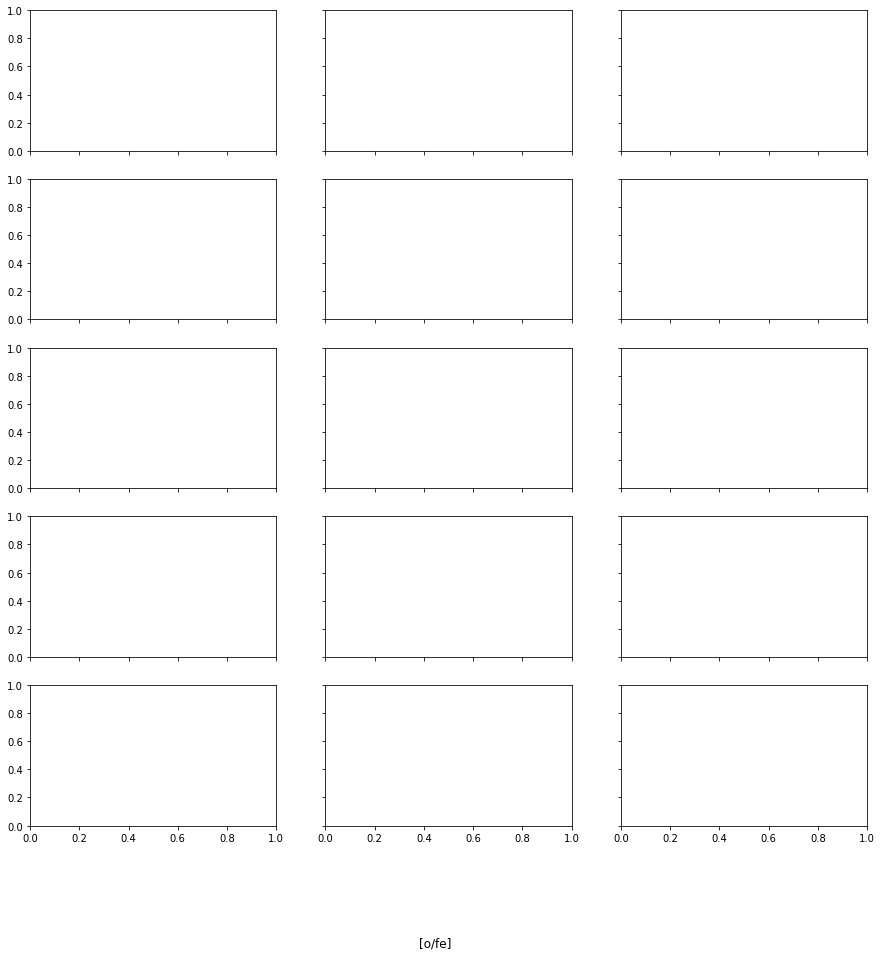

In [17]:
show_at_R_z(inside_out.stars, "[o/fe]", kde=True)

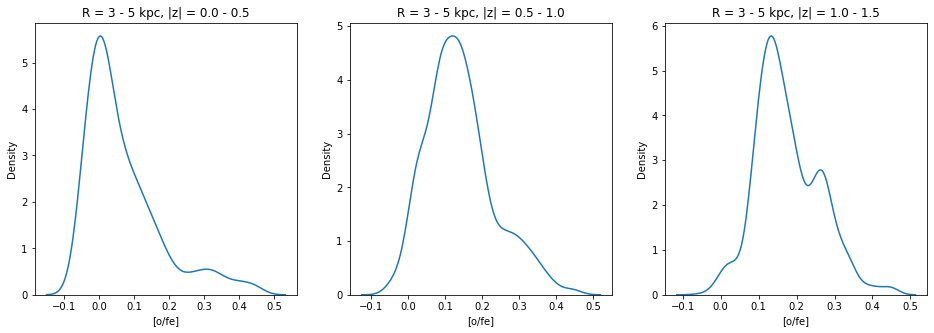

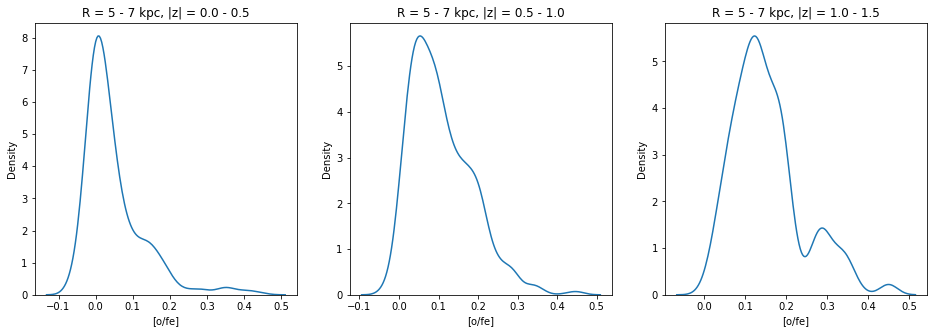

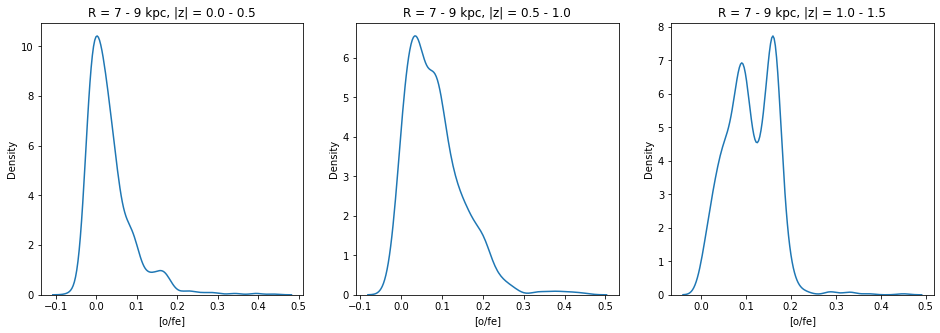

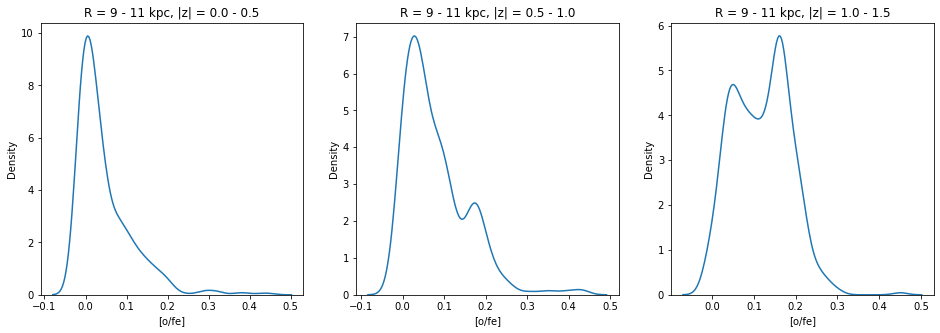

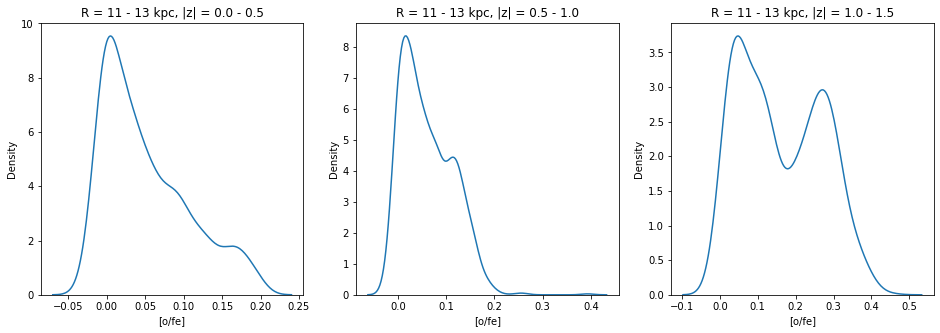

In [13]:
# these plots need fixed since we should sample from stellar populations with probability proportional to mass :(
for R_min, R_max in [(3,5), (5,7), (7,9), (9,11), (11,13)]:
    plt.figure(figsize=(16,5))
    
    for i in range(3):
        z_min, z_max = [(0, 0.5), (0.5, 1), (1, 1.5)][i]
        filtered = sample_stars(filter_stars(inside_out.stars, R_min, R_max, z_min, z_max), num=1000)
        plt.subplot(1,3,i+1)
        show_stars(filtered, "[o/fe]", label="|z| = %1.1f - %1.1f" % (z_min, z_max), kde=True)
        plt.title("R = %i - %i kpc, |z| = %1.1f - %1.1f" %(R_min, R_max, z_min, z_max))
    plt.show()
    


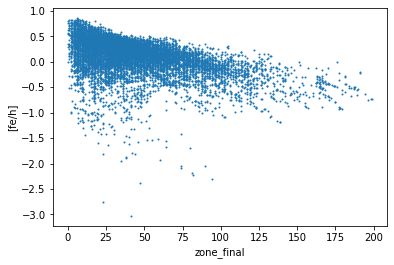

In [15]:
show_stars(stars, "zone_final", "[fe/h]")

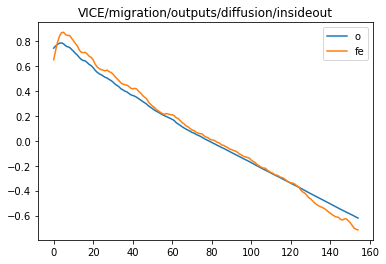

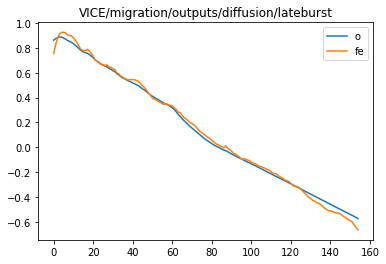

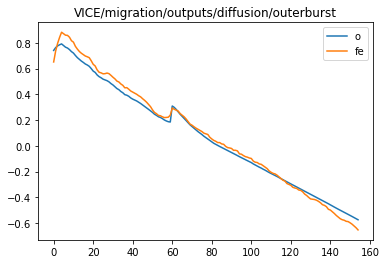

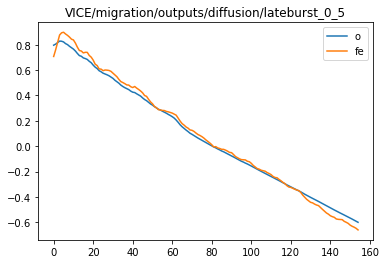

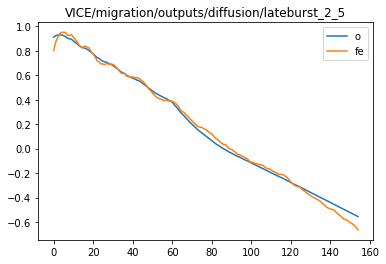

In [53]:
for model_ in [inside_out, late_burst, outer_burst, late_burst_small, late_burst_big]:
    for element in ["o", "fe"]:
        o_per_zone = [model_.zones["zone%i" % i].history["[%s/h]" % element][-1] for i in range(0, 155)]
        plt.plot(np.arange(0,155), o_per_zone, label=element)
    plt.legend()
    plt.title(model_.name)
    plt.show()

<Figure size 576x288 with 0 Axes>

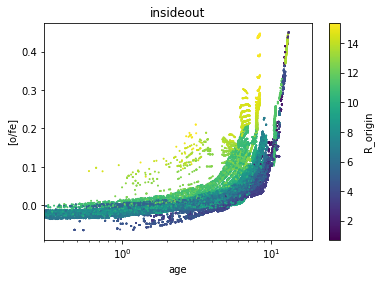

<Figure size 576x288 with 0 Axes>

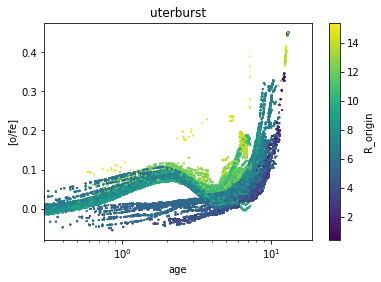

<Figure size 576x288 with 0 Axes>

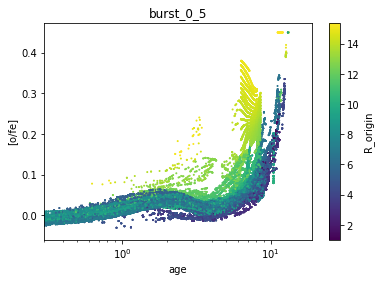

<Figure size 576x288 with 0 Axes>

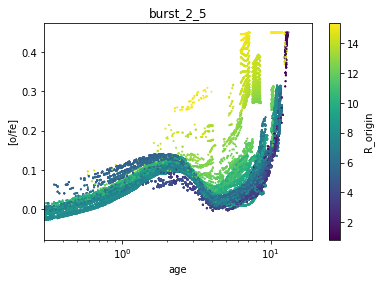

In [88]:
for model_ in [inside_out, outer_burst, late_burst_small, late_burst_big]:
    plt.figure(figsize=(8,4))
    show_stars(sample_stars(filter_stars(model_.stars, 7, 9, 0, 0.5), 10**5), "age", "[o/fe]", c="R_origin")
    plt.title(model_.name)
    plt.xscale("log")
    plt.xlim(0.3)
    plt.show()

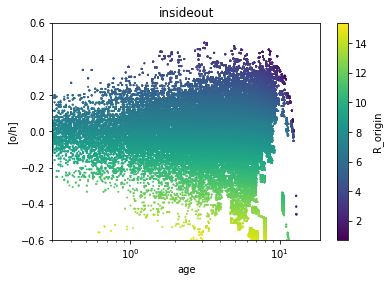

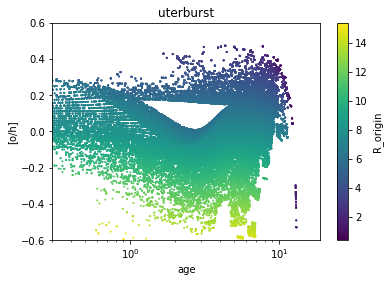

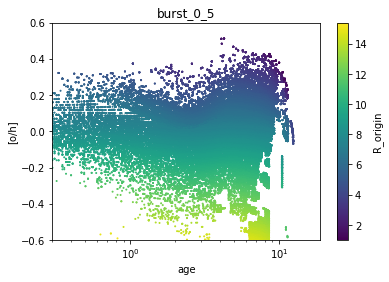

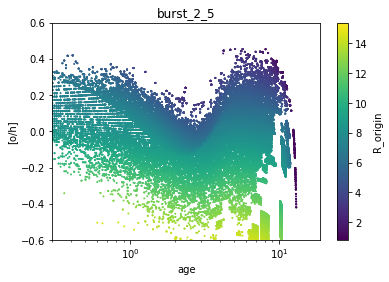

In [89]:
for model_ in [inside_out, outer_burst, late_burst_small, late_burst_big]:
    show_stars(sample_stars(filter_stars(model_.stars, 7, 9, 0, 0.5), 10**5), "age", "[o/h]", c="R_origin")
    plt.title(model_.name[-9:])
    plt.xscale("log")
    plt.xlim(0.3)
    plt.ylim(-0.6, 0.6)
    plt.show()

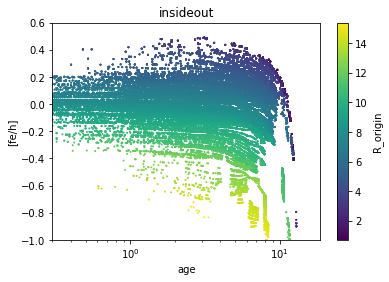

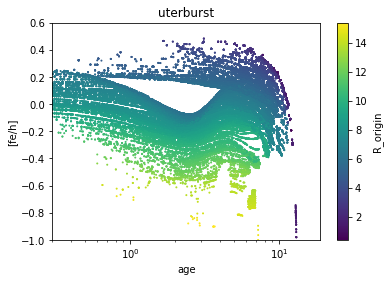

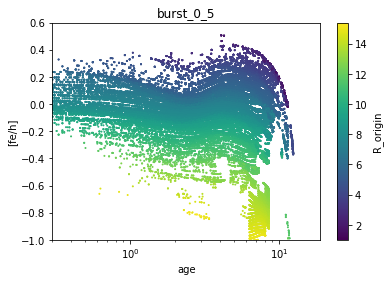

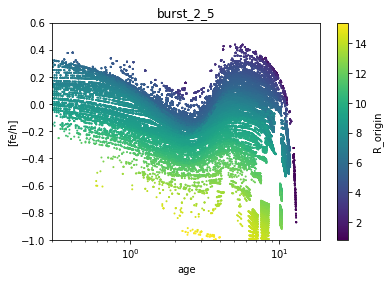

In [90]:
for model_ in [inside_out, outer_burst, late_burst_small, late_burst_big]:
    show_stars(sample_stars(filter_stars(model_.stars, 7, 9, 0, 0.5), 10**5), "age", "[fe/h]", c="R_origin")
    plt.title(model_.name[-9:])
    plt.xscale("log")
    plt.xlim(0.3)
    plt.ylim(-1, 0.6)
    plt.show()

In [54]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [12]:
sns.kdeplot?